<a href="https://colab.research.google.com/github/Y-B-Class-Projects/Image-processing-classification-of-dogs-and-cats/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Copyright 2018 Google LLC.

In [ ]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

## Written by: Baruch Baksht: 211302088 and Israel Rolnik: 206672057
## Lecturer: professor Avi Rosenfeld

### Exercise number 05, Image processing: classification of dogs and cats.


---



In [ ]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img


Download the images and prepare them:

In [ ]:
import os
import zipfile

!wget --no-check-certificate \
   https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip -O \
   /tmp/cats_and_dogs_filtered.zip
   
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
  
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

--2021-06-08 11:57:04--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.195.128, 172.253.117.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   119MB/s    in 0.6s    

2021-06-08 11:57:05 (119 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



**data_generator(is_augmentation):** A function that receives Boolean variable "is_augmentation" to determine if dropout and returns the train and validation sets.

In [ ]:
# Adding rescale, rotation_range, width_shift_range, height_shift_range,
# shear_range, zoom_range, and horizontal flip to our ImageDataGenerator

def data_generator(is_augmentation = False):

  if(is_augmentation):
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,)
  else:
    train_datagen = ImageDataGenerator(rescale=1./255)

  # Note that the validation data should not be augmented!
  val_datagen = ImageDataGenerator(rescale=1./255)

  # Flow training images in batches of 32 using train_datagen generator
  train_generator = train_datagen.flow_from_directory(
          train_dir,  # This is the source directory for training images
          target_size=(150, 150),  # All images will be resized to 150x150
          batch_size=20,
          # Since we use binary_crossentropy loss, we need binary labels
          class_mode='binary')

  # Flow validation images in batches of 32 using val_datagen generator
  validation_generator = val_datagen.flow_from_directory(
          validation_dir,
          target_size=(150, 150),
          batch_size=20,
          class_mode='binary')
  
  return train_generator, validation_generator

**def create_model(is_dropout = False, is_augmentation = False):**  Function that receives as input Boolean variables "is_dropout" and "is_augmentation" to determine if dropout and if augmentation and returns the model after  the fit.

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop

# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
from tensorflow import keras

def create_model(is_dropout = False, is_augmentation = False):
  
  train_generator, validation_generator = data_generator(is_augmentation)

  if is_dropout:
    model = keras.Sequential(
        [
            layers.Input(shape=(150, 150, 3)),
            # First convolution extracts 16 filters that are 3x3
            # Convolution is followed by max-pooling layer with a 2x2 window
            layers.Conv2D(16, 3, activation='relu'),
            layers.MaxPooling2D(2),
            # Second convolution extracts 32 filters that are 3x3
            # Convolution is followed by max-pooling layer with a 2x2 window
            layers.Conv2D(32, 3, activation='relu'),
            layers.MaxPooling2D(2),
            # Third convolution extracts 64 filters that are 3x3
            # Convolution is followed by max-pooling layer with a 2x2 window
            layers.Conv2D(64, 3, activation='relu'),
            layers.MaxPooling2D(2),
            # Flatten feature map to a 1-dim tensor so we can add fully connected layers
            layers.Flatten(),
            layers.Dropout(0.5), #only change!
            layers.Dense(512, activation='relu'),
            layers.Dense(1, activation='sigmoid'),
        ]
      )
  else:
      model = keras.Sequential(
        [
            layers.Input(shape=(150, 150, 3)),
            # First convolution extracts 16 filters that are 3x3
            # Convolution is followed by max-pooling layer with a 2x2 window
            layers.Conv2D(16, 3, activation='relu'),
            layers.MaxPooling2D(2),
            # Second convolution extracts 32 filters that are 3x3
            # Convolution is followed by max-pooling layer with a 2x2 window
            layers.Conv2D(32, 3, activation='relu'),
            layers.MaxPooling2D(2),
            # Third convolution extracts 64 filters that are 3x3
            # Convolution is followed by max-pooling layer with a 2x2 window
            layers.Conv2D(64, 3, activation='relu'),
            layers.MaxPooling2D(2),
            # Flatten feature map to a 1-dim tensor so we can add fully connected layers
            layers.Flatten(),
            layers.Dense(512, activation='relu'),
            layers.Dense(1, activation='sigmoid'),
        ]
      )

  model.summary()

  model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])
  
  history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

  return history

**def resultsEvaluation(history):** Function to display the results, The function receives the learning results of the model.

In [ ]:
def resultsEvaluation(history):
  # Retrieve a list of accuracy results on training and validation data
  # sets for each training epoch
  acc = history.history['acc']
  val_acc = history.history['val_acc']

  # Retrieve a list of list results on training and validation data
  # sets for each training epoch
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  # Get number of epochs
  epochs = range(len(acc))

  # Plot training and validation accuracy per epoch
  plt.plot(epochs, acc, 'r', label="Training accuracy")
  plt.plot(epochs, val_acc, 'b', label="Validation accuracy")
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  # Plot training and validation loss per epoch
  plt.plot(epochs, loss, 'r', label="Training loss")
  plt.plot(epochs, val_loss , 'b', label="Validation loss")
  plt.title('Training and validation loss')
  plt.legend()



---



### is_dropout = **False**, is_augmentation= **False**




Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
______________________________________

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


100/100 - 9s - loss: 0.8522 - acc: 0.5600 - val_loss: 0.6559 - val_acc: 0.6610
Epoch 2/30
100/100 - 8s - loss: 0.6448 - acc: 0.6600 - val_loss: 0.6163 - val_acc: 0.6460
Epoch 3/30
100/100 - 8s - loss: 0.5582 - acc: 0.7145 - val_loss: 0.5625 - val_acc: 0.7120
Epoch 4/30
100/100 - 8s - loss: 0.4957 - acc: 0.7675 - val_loss: 0.5848 - val_acc: 0.6960
Epoch 5/30
100/100 - 8s - loss: 0.4102 - acc: 0.8110 - val_loss: 0.6045 - val_acc: 0.7260
Epoch 6/30
100/100 - 8s - loss: 0.3098 - acc: 0.8580 - val_loss: 0.6612 - val_acc: 0.7110
Epoch 7/30
100/100 - 8s - loss: 0.2403 - acc: 0.8950 - val_loss: 0.8635 - val_acc: 0.6510
Epoch 8/30
100/100 - 8s - loss: 0.1556 - acc: 0.9425 - val_loss: 0.8623 - val_acc: 0.7140
Epoch 9/30
100/100 - 8s - loss: 0.1154 - acc: 0.9595 - val_loss: 1.1058 - val_acc: 0.7040
Epoch 10/30
100/100 - 8s - loss: 0.0789 - acc: 0.9740 - val_loss: 1.1848 - val_acc: 0.7300
Epoch 11/30
100/100 - 8s - loss: 0.0865 - acc: 0.9745 - val_loss: 1.3545 - val_acc: 0.7160
Epoch 12/30
100/100

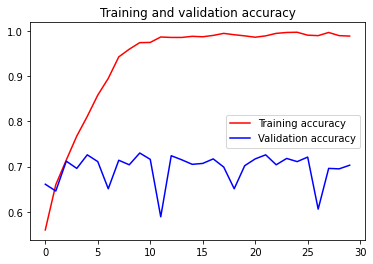

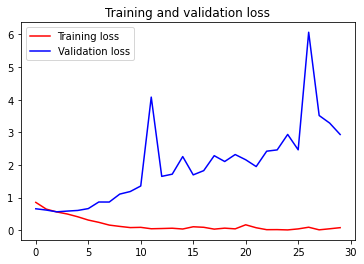

In [ ]:
history = create_model(is_dropout = False, is_augmentation= False)
resultsEvaluation(history)



---



### is_dropout = **True**, is_augmentation= **False**




Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
____________________________________

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


100/100 - 9s - loss: 0.7732 - acc: 0.5430 - val_loss: 0.6572 - val_acc: 0.5830
Epoch 2/30
100/100 - 8s - loss: 0.6626 - acc: 0.6390 - val_loss: 0.6241 - val_acc: 0.6400
Epoch 3/30
100/100 - 8s - loss: 0.5958 - acc: 0.6925 - val_loss: 0.5909 - val_acc: 0.6850
Epoch 4/30
100/100 - 8s - loss: 0.5324 - acc: 0.7355 - val_loss: 0.5971 - val_acc: 0.7140
Epoch 5/30
100/100 - 8s - loss: 0.4936 - acc: 0.7585 - val_loss: 0.5652 - val_acc: 0.7150
Epoch 6/30
100/100 - 8s - loss: 0.4410 - acc: 0.8000 - val_loss: 0.5618 - val_acc: 0.7200
Epoch 7/30
100/100 - 7s - loss: 0.3816 - acc: 0.8255 - val_loss: 0.5999 - val_acc: 0.7190
Epoch 8/30
100/100 - 8s - loss: 0.3342 - acc: 0.8595 - val_loss: 0.6156 - val_acc: 0.7130
Epoch 9/30
100/100 - 8s - loss: 0.3021 - acc: 0.8735 - val_loss: 0.6042 - val_acc: 0.7260
Epoch 10/30
100/100 - 8s - loss: 0.2541 - acc: 0.8980 - val_loss: 0.6784 - val_acc: 0.7390
Epoch 11/30
100/100 - 8s - loss: 0.2317 - acc: 0.9035 - val_loss: 0.7425 - val_acc: 0.7340
Epoch 12/30
100/100

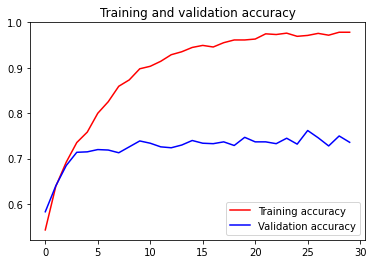

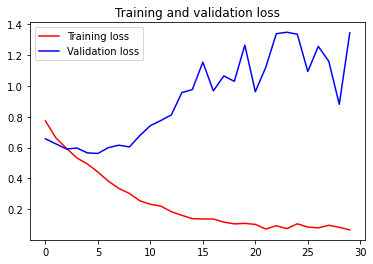

In [ ]:
history = create_model(is_dropout = True, is_augmentation= False)
resultsEvaluation(history)



---



### is_dropout = **False**, is_augmentation= **True**




Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 64)        0         
____________________________________

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


100/100 - 16s - loss: 0.7828 - acc: 0.5290 - val_loss: 0.6683 - val_acc: 0.6530
Epoch 2/30
100/100 - 15s - loss: 0.6735 - acc: 0.5815 - val_loss: 0.6317 - val_acc: 0.6360
Epoch 3/30
100/100 - 15s - loss: 0.6566 - acc: 0.6185 - val_loss: 0.6268 - val_acc: 0.6370
Epoch 4/30
100/100 - 15s - loss: 0.6475 - acc: 0.6375 - val_loss: 0.6318 - val_acc: 0.6290
Epoch 5/30
100/100 - 15s - loss: 0.6241 - acc: 0.6535 - val_loss: 0.6104 - val_acc: 0.6800
Epoch 6/30
100/100 - 15s - loss: 0.6426 - acc: 0.6480 - val_loss: 0.5814 - val_acc: 0.6960
Epoch 7/30
100/100 - 15s - loss: 0.6307 - acc: 0.6475 - val_loss: 0.5819 - val_acc: 0.6880
Epoch 8/30
100/100 - 15s - loss: 0.6001 - acc: 0.6840 - val_loss: 0.5735 - val_acc: 0.6970
Epoch 9/30
100/100 - 15s - loss: 0.5991 - acc: 0.6795 - val_loss: 0.5628 - val_acc: 0.7060
Epoch 10/30
100/100 - 15s - loss: 0.6013 - acc: 0.6825 - val_loss: 0.6033 - val_acc: 0.6600
Epoch 11/30
100/100 - 15s - loss: 0.5917 - acc: 0.6910 - val_loss: 0.5647 - val_acc: 0.7120
Epoch 12

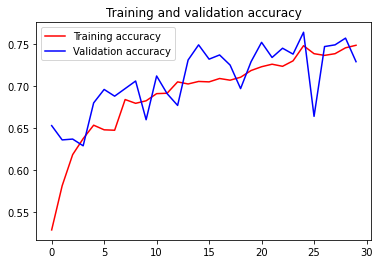

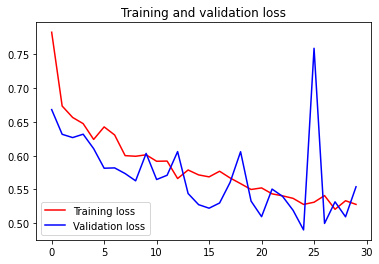

In [ ]:
history = create_model(is_dropout = False, is_augmentation= True)
resultsEvaluation(history)



---



### is_dropout = **True**, is_augmentation= **True**




Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 64)        0         
____________________________________

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


100/100 - 16s - loss: 0.7957 - acc: 0.5275 - val_loss: 0.6720 - val_acc: 0.5780
Epoch 2/30
100/100 - 15s - loss: 0.6967 - acc: 0.5645 - val_loss: 0.6416 - val_acc: 0.5810
Epoch 3/30
100/100 - 15s - loss: 0.6711 - acc: 0.6015 - val_loss: 0.6294 - val_acc: 0.6410
Epoch 4/30
100/100 - 15s - loss: 0.6430 - acc: 0.6360 - val_loss: 0.6231 - val_acc: 0.6430
Epoch 5/30
100/100 - 15s - loss: 0.6312 - acc: 0.6615 - val_loss: 0.6028 - val_acc: 0.7010
Epoch 6/30
100/100 - 15s - loss: 0.6232 - acc: 0.6595 - val_loss: 0.5835 - val_acc: 0.7010
Epoch 7/30
100/100 - 15s - loss: 0.6219 - acc: 0.6510 - val_loss: 1.4477 - val_acc: 0.5330
Epoch 8/30
100/100 - 15s - loss: 0.6196 - acc: 0.6680 - val_loss: 0.5771 - val_acc: 0.7040
Epoch 9/30
100/100 - 15s - loss: 0.6093 - acc: 0.6850 - val_loss: 0.5579 - val_acc: 0.6970
Epoch 10/30
100/100 - 15s - loss: 0.5831 - acc: 0.6920 - val_loss: 0.5447 - val_acc: 0.7140
Epoch 11/30
100/100 - 15s - loss: 0.6006 - acc: 0.6800 - val_loss: 0.5530 - val_acc: 0.7110
Epoch 12

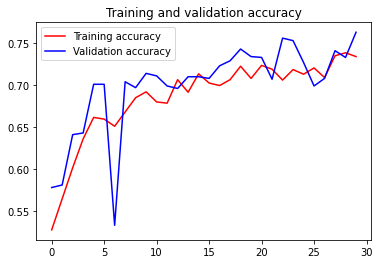

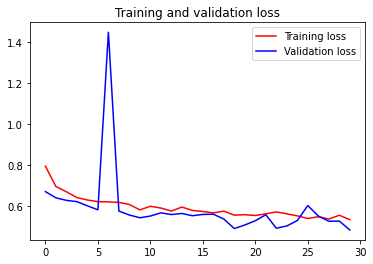

In [ ]:
history = create_model(is_dropout = True, is_augmentation= True)
resultsEvaluation(history)

We wanted to try to pass the 95% accuracy and built the following model that based on [this](https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/) article.

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
32/32 [==============================] - 15s 442ms/step - loss: 4.7736 - accuracy: 0.8310 - val_loss: 0.3109 - val_accuracy: 0.9700
Epoch 2/10
32/32 [==============================] - 14s 434ms/step - loss: 0.1051 - accuracy: 0.9826 - val_loss: 0.2329 - val_accuracy: 0.9690
Epoch 3/10
32/32 [==============================] - 14s 434ms/step - loss: 0.0234 - accuracy: 0.9913 - val_loss: 0.1623 - val_accuracy: 0.9720
Epoch 4/10
32/32 [==============================] - 14s 436ms/step - loss: 8.7904e-04 - accuracy: 1.0000 - val_loss: 0.1639 - val_accuracy: 0.9740
Epoch 5/10
32/32 [==============================] - 14s 439ms/step - loss: 2.7518e-04 - accuracy: 1.0000 - val_loss: 0.1655 - val_accuracy: 0.9730
Epoch 6/10
32/32 [==============================] - 14s 435ms/step - loss: 1.9873e-04 - accuracy: 1.0000 - val_loss: 0.1674 - val_accuracy: 0.9730
Epoch 7/10
32/32 [==============================] - 14s 433ms/step - loss: 1.6140e-04 - accuracy: 1.0000 - val_loss: 0.1690 - val_

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


> 97.300


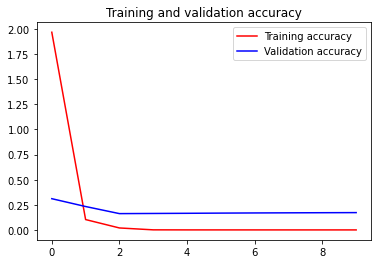

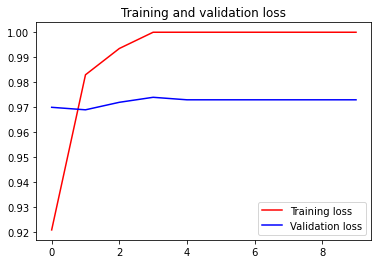

In [ ]:
# vgg16 model used for transfer learning on the dogs and cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(224, 224, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(1, activation='sigmoid')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
  # Plot training and validation accuracy per epoch
  plt.plot(history.history['loss'], 'r', label="Training accuracy")
  plt.plot(history.history['val_loss'], 'b', label="Validation accuracy")
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  # Plot training and validation loss per epoch
  plt.plot(history.history['accuracy'], 'r', label="Training loss")
  plt.plot(history.history['val_accuracy'], 'b', label="Validation loss")
  plt.title('Training and validation loss')
  plt.legend()
 

# run the test harness for evaluating a model
def run_test_harness():
  # define model
  model = define_model()
  # create data generator
  datagen = ImageDataGenerator(featurewise_center=True)
  # specify imagenet mean values for centering
  datagen.mean = [123.68, 116.779, 103.939]
  # prepare iterator
  train_it = datagen.flow_from_directory(train_dir,
    class_mode='binary', batch_size=64, target_size=(224, 224))
  test_it = datagen.flow_from_directory(validation_dir,
    class_mode='binary', batch_size=64, target_size=(224, 224))
  # fit model
  history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
    validation_data=test_it, validation_steps=len(test_it), epochs=10, verbose=1)
  # evaluate model
  _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
  print('> %.3f' % (acc * 100.0))
  # learning curves
  return history

history = run_test_harness()
summarize_diagnostics(history)

### We got about **97%** accuracy